# AI Powered Game

Esta práctica es una adaptación del contenido del curso:

https://learn.deeplearning.ai/courses/building-an-ai-powered-game/lesson/1/introduction


usando langchain y llama 3


**Con esta práctica aprenderás:**

- Dar la estructura deseada a la respuesta del modelo
- Guardar la información para su uso posterior


## Creating a Pirate World

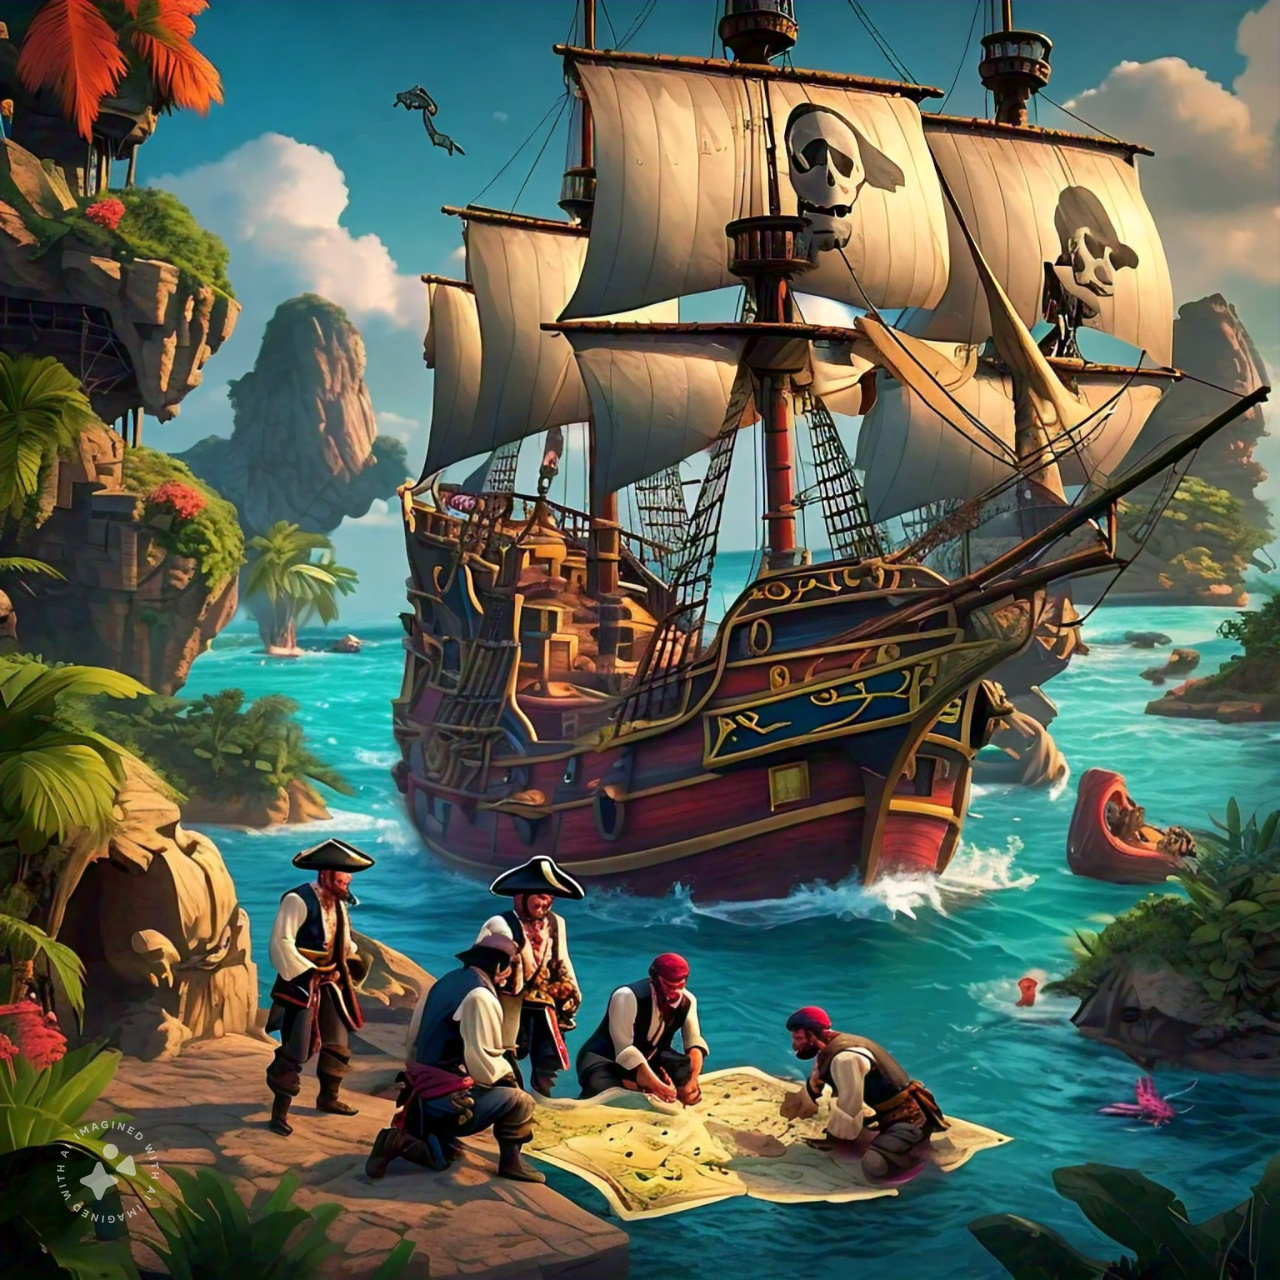

In [1]:
 # install this version: pip install langchain_ollama 'ollama<0.4.0'

In [2]:
!pip install langchain==0.3.9 langchain-core==0.3.21 langchain-ollama==0.2.0

In [3]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field

In [4]:
class World(BaseModel):
    WorldName: str = Field(description="name of the world")
    WorldDesc: str = Field(description="description of the world")


In [5]:
world_prompt = f"""
Generate a creative description for a unique fantasy world with an
interesting concept around pirates, ships, sea and treasures. 
Create a world, giving it a name and a description. Write in spanish always.
"""

In [9]:
local_llm = 'llama3.2'
llm = ChatOllama(model=local_llm, temperature=1)
parser = JsonOutputParser(pydantic_object=World)
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain = prompt | llm | parser

result_world=chain.invoke({"query": world_prompt})

In [7]:
result_world['properties']

NameError: name 'result_world' is not defined

In [15]:
world = {
    "name": result_world['properties']['worldname']['title'],
    "description": result_world['properties']['worldname']['description']
}

KeyError: 'worldname'

In [25]:
world

{'name': 'Nuestra Tierra del Mar',
 'description': 'una tierra de misterio y magia, donde los piratas navegan por aguas desconocidas en busca de tesoros y aventuras'}

In [20]:
island_prompt = f"""
Create three islands in a fantasy pirates world, giving them a name and a description.
"""

In [21]:
class Island(BaseModel):
    IslandName: str = Field(description="name of the island")
    IslandDesc: str = Field(description="description of the island")


In [ ]:
parser2 = JsonOutputParser(pydantic_object=Island)
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser2.get_format_instructions()},
)

chain2 = prompt | llm | parser2

result_island=chain2.invoke({"query": island_prompt})

In [39]:
result_island['properties']

{'IslandName1': {'title': 'Islandname1',
  'description': 'description of Islandname1',
  'type': 'string'},
 'IslandDesc1': {'title': 'Islanddesc1',
  'description': 'description of Islanddesc1',
  'type': 'string'},
 'IslandName2': {'title': 'Islandname2',
  'description': 'description of Islandname2',
  'type': 'string'},
 'IslandDesc2': {'title': 'Islanddesc2',
  'description': 'description of Islanddesc2',
  'type': 'string'},
 'IslandName3': {'title': 'Islandname3',
  'description': 'description of Islandname3',
  'type': 'string'},
 'IslandDesc3': {'title': 'Islanddesc3',
  'description': 'description of Islanddesc3',
  'type': 'string'}}

In [ ]:
islands = {}
for i in range(3):
    name = result_island['properties'][f'IslandName{i+1}']['title']
    desc = result_island['properties'][f'IslandDesc{i+1}']['description']
    island = {
      "name": name,
      "description": desc,
      "world": world['name']
    }
    islands[name] = island
world['islands']=islands

In [45]:
town_prompt = f"""
Create three towns for a fantasy pirate world named {world['name']}.
"""

In [46]:
class Town(BaseModel):
    TownName: str = Field(description="name of the town")
    TownDesc: str = Field(description="description of the town")

In [47]:
parser3 = JsonOutputParser(pydantic_object=Town)
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": parser3.get_format_instructions()},
    )

chain3 = prompt | llm | parser3
result_town=chain3.invoke({"query": town_prompt})


In [49]:
result_town['properties']

{'TownName': {'title': 'Townname',
  'description': 'name of the town',
  'type': 'string'},
 'TownDesc': {'title': 'Towndesc',
  'description': 'description of the town',
  'type': 'string'}}

## Save the World


In [ ]:
import json

def save_world(world, filename):
    with open(filename, 'w') as f:
        json.dump(world, f)

def load_world(filename):
    with open(filename, 'r') as f:
        return json.load(f)

save_world(result_world, 'PirateWorld.json')